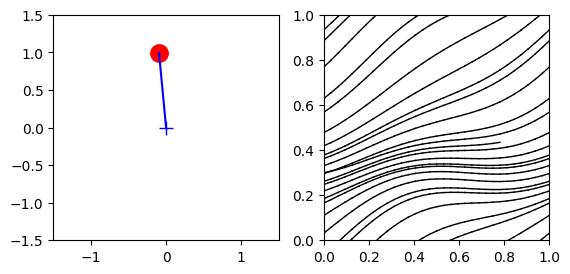

In [2]:
# Define parameters
from QUASIP_functions import quasip_test, quasip_anim
import numpy as np

# Define parameters
Map = 0
alpha = 1
beta = 1.576
gamma = 1
A = 1.4
B = 1
Omega = 1.76 #0.292 #1.76
Picture = 3
k = 1
b = 0.25

# Call the function with the parameters
Pendulum, Circle_map, Theta_dot, Torus = quasip_test(Map, alpha, beta, gamma, A, B, Omega, Picture, k, b)

quasip_anim(Pendulum, Circle_map, Theta_dot, Torus, Map, Picture)



In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Video


# %matplotlib notebook

if Map == 0:
    # Create figure and axis
    fig, axs = plt.subplots(1, 2)  # Create 2 subplots

    axs[0].set_xlim(-1.5, 1.5)
    axs[0].set_ylim(-1.5, 1.5)
    axs[0].set_aspect('equal')


    # Create a red dot plot element
    red_dot, = axs[0].plot([], [], 'r.', markersize=25)
    pluses, = axs[0].plot([], [], 'b+', markersize=10)
    blue_line, = axs[0].plot([], [], 'b-')

    if Picture == 1:
        # black_dot, = axs[1].plot([], [], 'k.', markersize=10)
        black_dot = axs[1].scatter([], [], s=25, color='k')
        axs[1].set_xlim(0, 1)
        axs[1].set_ylim(0, 1) 
        axs[1].set_aspect('equal')

    elif Picture == 2:
        black_dot = axs[1].scatter([], [], s=25, color='k')
        axs[1].set_xlim(0, 1)
        axs[1].set_ylim(0, 1) 
        axs[1].set_aspect('equal')

    elif Picture == 3:
        black_line = axs[1].plot([], [], '-k', linewidth=1)
        axs[1].set_xlim(0, 1)
        axs[1].set_ylim(0, 1)
        axs[1].set_aspect('equal')

    # Create the animation
    ani = FuncAnimation(fig, update, frames=range(len(Pendulum)), init_func=init, blit=True, interval=30)
    # HTML(ani.to_html5_video().replace('<video ', '<video autoplay '))


    if Picture == 1:
        ani.save('animation_Circle_map.mp4')
        Video('animation_Circle_map.mp4')
    elif Picture == 2:
        ani.save('animation_Theta_dot.mp4')
        Video('animation_Theta_dot.mp4')
    elif Picture == 3:
        ani.save('animation_Torus.mp4')
        Video('animation_Torus.mp4')    

elif Map == 1:
    # Create figure and axis
    fig, axs = plt.subplots(1, 1)  # Create 2 subplots

    axs.set_xlim(0, 1)
    axs.set_ylim(0, 1)
    axs.set_aspect('equal')

    if Picture == 1:
        xx_r, yy_r = zip(*Circle_map[:])
        # axs.clear()  # Clear the second subplot
        axs.scatter(xx_r, yy_r, s=25, color='k')  # Redraw the scatter plot
        axs.set_xlim(0, 1)
        axs.set_ylim(0, 1) 
        axs.set_aspect('equal')
        # print(xx_r, yy_r)

    elif Picture == 2:
        xx_t, yy_t = zip(*Theta_dot[:])
        axs.clear()  # Clear the second subplot  
        axs.scatter(xx_t, yy_t, s=25, color='k')
        axs.set_xlim(0, 1)
        # axs[1].set_ylim(0, 3)
        axs.set_aspect('equal')            
    elif Picture == 3:
        print('No picture for this map')

    plt.show()



# Initialization function for the animation
def init():
    red_dot.set_data([], [])
    pluses.set_data([], [])
    blue_line.set_data([], [])

    # axs[1].clear()  # Clear the second subplot
    return red_dot, pluses, blue_line,

# Update function for the animation
def update(frame):
    # Get the current position
    b1, b2 = Pendulum[frame]
    # Set the red dot's data as a tuple
    red_dot.set_data((b1,), (b2,))
    pluses.set_data([0], [0])  # Pass a list or a tuple to set_data
    blue_line.set_data([0, b1,], [0, b2,])
    if Picture == 1:
        if frame % 32 == 0:  
            frame2 = frame // 32  
            if frame2 > 0:  
                xx_r, yy_r = zip(*Circle_map[0:frame2])
                axs[1].clear()  
                axs[1].scatter(xx_r, yy_r, s=25, color='k')  
                axs[1].set_xlim(0, 1)
                axs[1].set_ylim(0, 1) 
                axs[1].set_aspect('equal')

    elif Picture == 2:
        if frame % 32 == 0:
            frame2 = frame // 32
            if frame2 > 0:
                xx_t, yy_t = zip(*Theta_dot[0:frame2])
                axs[1].clear()  # Clear the second subplot  
                axs[1].scatter(xx_t, yy_t, s=25, color='k')
                axs[1].set_xlim(0, 1)
                # axs[1].set_ylim(0, 3)
                axs[1].set_aspect('equal')            

    elif Picture == 3:
        xline, yline = Torus_array[frame, 0, :], Torus_array[frame, 1, :]
        axs[1].plot(xline, yline, '-k', linewidth=1)
        axs[1].set_xlim(0, 1)
        axs[1].set_ylim(0, 1) 
        axs[1].set_aspect('equal')

    return red_dot, pluses, blue_line,



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time  # Add this at the beginning of your file


# Define the main function
def quasip(Map, alpha, beta, gamma, A, B, Omega, Picture, k, b):
    global h
    animsteps = 3 #32

    # User input for choosing between map and ODE
    Map = input('Choose Map=1 for the map and Map=0 for the differential equation\nMap = ')
    if not Map.isdigit() or int(Map) not in [0, 1]:
        raise ValueError('You have to set Map to 0 or 1')
    Map = int(Map)

    # Initialization of variables
    h = 2 * np.pi / (animsteps * Omega)  # Step size calculation
    print('Step size is ', h)
    
    # Initial state vector
    xc = np.array([0.3 * 2 * np.pi, 0.3, 0])
    yy = xc[0] / (2 * np.pi)  # Normalizing the first element of xc
    tn = yy
    rn = 0.3
    t = 0

    # Warning if Map is on in combination with Picture 3
    if Map == 1 and Picture == 3:
        print('The option Map is not compatible with Picture option 3, Picture option is set to 1')
        Picture = 1

    n = 1
    nit = 20
    
    # fig, ax1, ax2 = init_figure()
    plt.show()

    # Clear current figure
    plt.clf()

    # Creating a 'Stop' button - this is a placeholder and might need further integration with GUI event loop
    # For full functionality, you might need to use a GUI framework like Tkinter
    stop_button = plt.axes([0.81, 0.05, 0.1, 0.075])
    button = plt.Button(stop_button, 'Stop')
    button.on_clicked(stopf)  # Linking to a stop function

    if Map == 0:
        # Create first subplot
        ax1 = plt.subplot(1, 2, 1)
        ax1.axis([-1.5, 1.5, -1.5, 1.5])
        ax1.set_aspect('equal', 'box')
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_title('Pendanim')

        # Create second subplot
        ax2 = plt.subplot(1, 2, 2)
    else:
        ax2 = plt.subplot(1, 1, 1)

    ax2.axis([0, 1, 0, 1])
    ax2.set_aspect('equal', 'box')

    # Set labels based on Picture value
    if Picture == 1:
        ax2.set_xlabel(r'$\theta_n$', fontsize=12)
        ax2.set_ylabel(r'$\theta_{n+1}$', fontsize=12)
    elif Picture == 2:
        ax2.set_xlabel(r'$\theta_n$', fontsize=12)
        ax2.set_ylabel(r'$\dot{\theta_n}$', fontsize=12)
        if Map == 0:
            ax2.axis([0, 1, -3, 3])
        else:
            ax2.axis([0, 1, -0.5, 0.5])
    elif Picture == 3:
        ax2.set_xlabel('t mod (2π / Ω)')
        ax2.set_ylabel('θ mod 2π')



    fig, ax = plt.subplots()
    fig.set_size_inches(15, 7)  # Set the figure size

    # Create a red dot plot element that will be updated in the loop
    red_dot, = ax.plot([], [], 'r.', markersize=25)

    # Set the axes limits
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

    while n < nit:
        if Map == 0:
            # Update state using Runge-Kutta method
            xc = Runge(xc)
            b1 = np.sin(xc[0])
            b2 = -np.cos(xc[0])

            # Update the red dot's position
            red_dot.set_data(b1, b2)
            print(b1, b2)
            plt.pause(1)  # Pause for 1 second and force the plot to be displayed

        n += 1

    plt.show()

    # plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)  # Adjust subplot to make room for button

    # fig = plt.gcf()
    # fig.set_size_inches(15, 7)  # Set the figure size to 20x10
    # print(h)
    while n < nit:
        if Map == 0:
            b1 = np.sin(xc[0])
            b2 = -np.cos(xc[0])

            # Update the plot for pendulum
            plt.plot(b1, b2, 'r.', markersize=25)
            print(b1, b2)
            plt.pause(1)  # Pause for 1 second and force the plot to be displayed
            xc = Runge(xc)

            # Update state using Runge-Kutta method
            for i in range(animsteps):
                t += h
                xc = Runge(xc)

                # Clear and update the plot for pendulum
                # ax.plot(0, 0, '+', markersize=10)
                # ax.plot([0, b1], [0, b2], 'b-')
                # ax.plot(b1, b2, 'r.', markersize=25)
                # print(b1, b2)
                # plt.pause(1)  # Pause for 0.1 second and force the plot to be displayed
                # ax.clear()

                # Additional plotting based on Picture
                if Picture == 3:
                    # Implement the logic for 2D torus plot
                    pass  # Placeholder for the 2D torus plot logic

            tn = xc[0] / (2 * np.pi)
            rn = xc[1]

        else:
            # Logic when Map is switched on
            ro = rn
            to = tn
            rn = b * ro - k / (2 * np.pi) * np.sin(2 * np.pi * (to % 1))
            tn = to + Omega + rn

        # Plotting based on Picture
        if Picture == 1:
            yy = tn % 1
            xx = to % 1
            print(xx, yy)
            ax.plot(xx, yy, '.k')  # Plot on the existing subplot
            plt.pause(1)
        elif Picture == 2:
            yy = rn
            xx = tn % 1
            plt.subplot(1, 2, 2).plot(xx, yy, '.k')
            plt.pause(0.01)

        n += 1


quasip(Map, alpha, beta, gamma, A, B, Omega, Picture, k, b)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define your Runge function and initialize variables (xc, tn, rn, etc.) here

# Assuming initial setup is done and global variables are defined
nit = 20
n = 1
animsteps = 32
h = 2 * np.pi / (animsteps * Omega)  # Step size
xc = np.array([0.3 * 2 * np.pi, 0.3, 0])  # Example initial condition
tn, rn, t = 0, 0, 0
Map = 0

# Create figure for animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Function to update animation
def update(frame):
    global xc, tn, rn, t
    if Map == 0:
        b1 = np.sin(xc[0])
        b2 = -np.cos(xc[0])
        ax1.clear()
        ax1.plot(0, 0, '+', markersize=10)
        ax1.plot([0, b1], [0, b2], 'b-')
        ax1.plot(b1, b2, 'r.', markersize=25)
        print(b1, b2)

        if Picture == 3:
            # Implement the 2D torus plot logic
            pass  # Placeholder for 2D torus plot

        for i in range(animsteps):
            t += h
            xc = Runge(xc)

        tn = xc[0] / (2 * np.pi)
        rn = xc[1]
    else:
        # Logic when Map is switched on
        pass  # Placeholder for alternate Map logic

    if Picture == 1 or Picture == 2:
        yy = rn if Picture == 2 else tn % 1
        xx = tn % 1
        ax2.plot(xx, yy, '.k')

# Create the animation
# ani = FuncAnimation(fig, update, frames=nit, interval=100)

# plt.show()
update

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import base64
from io import BytesIO


# List of positions for b1 and b2
positions = [
    (0.25729264510117394, 0.9663335318495583),
    (-0.40361093027451206, 0.9149307170288595),
    (-0.7356012019132884, -0.6774148446437571),
    (0.3138261714231694, -0.9494804548435294),
    (0.8555113606788947, -0.5177840396819375),
    (0.9164508837155408, 0.4001471950882629),
    (0.9034698500779083, 0.4286516417794313),
    (0.782871499459326, 0.6221834257952444),
    (-0.1992429496036271, 0.9799501247682183),
    (-0.8507440549178761, 0.5255802060788533),
    (-0.6099022724211463, -0.7924766356780003),
    (0.8997054051649611, -0.43649763334633684),
    (0.9725251049728278, -0.23279802447097842),
    (0.9996246578494146, -0.027396047514938963),
    (0.6694781232401108, 0.7428317726799919),
    (0.5325890149175815, 0.8463739960496897),
    (0.05500062839289174, 0.9984863198243564),
    (-0.9992907493241475, -0.0376563183965692)
]

# Create figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# Create a red dot plot element
red_dot, = ax.plot([], [], 'r.', markersize=25)

# Initialization function for the animation
def init():
    red_dot.set_data([], [])
    return red_dot,

# Update function for the animation
def update(frame):
    # Get the current position
    b1, b2 = positions[frame]
    # Set the red dot's data as a tuple
    red_dot.set_data((b1,), (b2,))
    return red_dot,



ani = FuncAnimation(fig, update, frames=range(len(positions)), init_func=init, blit=True, interval=500)
# Display the animation with autoplay
HTML(ani.to_html5_video().replace('<video ', '<video autoplay '))


Initialize the figure

In [ ]:
import matplotlib.pyplot as plt

def init_figure():
    # Clear current figure
    plt.clf()

    # Creating a 'Stop' button - this is a placeholder and might need further integration with GUI event loop
    # For full functionality, you might need to use a GUI framework like Tkinter
    stop_button = plt.axes([0.81, 0.05, 0.1, 0.075])
    button = plt.Button(stop_button, 'Stop')
    button.on_clicked(stopf)  # Linking to a stop function

    if Map == 0:
        # Create first subplot
        ax1 = plt.subplot(1, 2, 1)
        ax1.axis([-1.5, 1.5, -1.5, 1.5])
        ax1.set_aspect('equal', 'box')
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_title('Pendanim')

        # Create second subplot
        ax2 = plt.subplot(1, 2, 2)
    else:
        ax2 = plt.subplot(1, 1, 1)

    ax2.axis([0, 1, 0, 1])
    ax2.set_aspect('equal', 'box')

    # Set labels based on Picture value
    if Picture == 1:
        ax2.set_xlabel(r'$\theta_n$', fontsize=12)
        ax2.set_ylabel(r'$\theta_{n+1}$', fontsize=12)
    elif Picture == 2:
        ax2.set_xlabel(r'$\theta_n$', fontsize=12)
        ax2.set_ylabel(r'$\dot{\theta_n}$', fontsize=12)
        if Map == 0:
            ax2.axis([0, 1, -3, 3])
        else:
            ax2.axis([0, 1, -0.5, 0.5])
    elif Picture == 3:
        ax2.set_xlabel('t mod (2π / Ω)')
        ax2.set_ylabel('θ mod 2π')

    plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)  # Adjust subplot to make room for button

    fig = plt.gcf()
    fig.set_size_inches(20, 10)  # Set the figure size to 20x10

    
    while n < nit:
        if Map == 0:
            b1 = np.sin(xc[0])
            b2 = -np.cos(xc[0])

            # Update state using Runge-Kutta method
            for i in range(animsteps):
                t += h
                xc = Runge(xc)

                # Clear and update the plot for pendulum
                plt.subplot(1, 2, 1).cla()
                plt.plot(0, 0, '+', markersize=10)
                plt.plot([0, b1], [0, b2], 'b-')
                plt.plot(b1, b2, 'r.', markersize=25)
                plt.pause(0.01)

                # Additional plotting based on Picture
                if Picture == 3:
                    # Implement the logic for 2D torus plot
                    pass  # Placeholder for the 2D torus plot logic

            tn = xc[0] / (2 * np.pi)
            rn = xc[1]

        else:
            # Logic when Map is switched on
            ro = rn
            to = tn
            rn = b * ro - k / (2 * np.pi) * np.sin(2 * np.pi * (to % 1))
            tn = to + Omega + rn

        # Plotting based on Picture
        if Picture == 1:
            yy = tn % 1
            xx = to % 1
            plt.subplot(1, 2, 2).plot(xx, yy, '.k')
            plt.pause(0.01)
        elif Picture == 2:
            yy = rn
            xx = tn % 1
            plt.subplot(1, 2, 2).plot(xx, yy, '.k')
            plt.pause(0.01)

        n += 1

    return fig, ax1 if Map == 0 else None, ax2


Functions equations, Runge, stopf

In [ ]:
import numpy as np

# Global variables
global alpha, beta, gamma, A, B, Omega, h

def equations(x):
    # Define the differential equations
    f = np.zeros(3)
    f[0] = x[1]
    f[1] = 1 / alpha * (-beta * x[1] - gamma * np.sin(x[0]) + A + B * np.cos(Omega * x[2]))
    f[2] = 1
    return f

def Runge(xc):
    # Runge-Kutta 4th order method
    n = len(xc)
    x = np.zeros_like(xc)
    c1 = np.zeros_like(xc)
    c2 = np.zeros_like(xc)
    c3 = np.zeros_like(xc)
    c4 = np.zeros_like(xc)

    for i in range(n):
        x[i] = xc[i]
    f = equations(x)
    for i in range(n):
        c1[i] = h * f[i]

    for i in range(n):
        x[i] = xc[i] + c1[i] / 2
    f = equations(x)
    for i in range(n):
        c2[i] = h * f[i]

    for i in range(n):
        x[i] = xc[i] + c2[i] / 2
    f = equations(x)
    for i in range(n):
        c3[i] = h * f[i]

    for i in range(n):
        x[i] = xc[i] + c3[i]
    f = equations(x)
    for i in range(n):
        c4[i] = h * f[i]

    for i in range(n):
        xc[i] = xc[i] + (c1[i] + 2 * c2[i] + 2 * c3[i] + c4[i]) / 6

    return xc

def stopf(event):
    # Event handler for the stop button
    # In a GUI application, this would terminate the event loop or close the window
    pass  # Placeholder, functionality depends on GUI framework used


In [ ]:
import matplotlib.pyplot as plt
import time  # Add this at the beginning of your file

# Define the main function
def quasip(Map, alpha, beta, gamma, A, B, Omega, Picture, k, b):
    global h
    animsteps = 32

    Map = 0 

    # Initialization of variables
    h = 2 * np.pi / (animsteps * Omega)  # Step size calculation
    print('Step size is ', h)
    
    # Initial state vector
    # xc = np.array([0.3 * 2 * np.pi, 0.3, 0])
    xc = np.array([0.3 * 2 * np.pi, 0.3, 0])

    # yy = xc[0] / (2 * np.pi)  # Normalizing the first element of xc
    yy = [xc[0] / (2 * np.pi), 0]  # Normalizing the first element of xc and initializing the second element

    tn = yy[0]
    rn = 0.3
    t = 0

    # Warning if Map is on in combination with Picture 3
    if Map == 1 and Picture == 3:
        print('The option Map is not compatible with Picture option 3, Picture option is set to 1')
        Picture = 1
    
    n = 1
    nit = 20
    positions_1 = []
    positions_2 = []
    positions_3 = []
    while n < nit:
        if Map == 0:
            b1 = np.sin(xc[0])
            b2 = -np.cos(xc[0])

            # print('b1 = ', b1, 'b2 = ', b2)
            to = tn
            # xx=0
            xx = [0, 0]  # Initializing xx as a list with two elements

            # Update state using Runge-Kutta method
            for i in range(animsteps):
                t += h
                xc = Runge_test(xc,alpha,beta,gamma,A,B,Omega,h)
                b1 = np.sin(xc[0])
                b2 = -np.cos(xc[0])            
                positions_1.append((b1, b2))  # Append a tuple of (b1, b2) to the list

                
                if Picture == 3:
                    # 2D torus plot (theta vs time)
                    tn = xc[0] / (2 * np.pi)
                    yy[1] = tn % 1
                    xx[1] = xx[0] + h * Omega / (2 * np.pi)

                    if yy[1] < 0:
                        yy[1] += 1.0

                    # Periodic boundary conditions
                    if yy[1] > (yy[0] + 0.5):
                        xtemp = xx[0] - yy[0] * (xx[1] - xx[0]) / (yy[1] - 1 - yy[0])
                        xline = [xx[0], xtemp]
                        yline = [yy[0], 0]
                        # axs[1].plot(xline, yline, '-k')
                        positions_3.append((xline, yline))
                        xx[0], yy[0] = xtemp, 1
                    elif yy[1] < (yy[0] - 0.5):
                        xtemp = xx[0] + (1 - yy[0]) * (xx[1] - xx[0]) / (yy[1] + 1 - yy[0])
                        xline = [xx[0], xtemp]
                        yline = [yy[0], 1]
                        # axs[1].plot(xline, yline, '-k')
                        positions_3.append((xline, yline))
                        xx[0], yy[0] = xtemp, 0

                    # Update the lines for the current frame
                    xline = [xx[0], xx[1]]
                    yline = [yy[0], yy[1]]
                    # axs[1].plot(xline, yline, '-k')
                    positions_3.append((xline, yline))
                    xx[0], yy[0] = xx[1], yy[1]





            tn = xc[0] / (2 * np.pi)
            rn = xc[1]
            
        
        # Check if Picture is set to 1
        if Picture == 1:
            yy[0] = tn % 1
            xx[0] = to % 1
            
            positions_2.append((xx[0], yy[0]))
            # # Create subplot only if Map is 0
            # if Map == 0:
            #     ax = plt.subplot(1, 2, 2)
            # else:
            #     ax = plt.gca()  # Get current axis

            # Plot the 1D map
            # ax.plot(xx, yy, '.k')
            # plt.pause(0.01)  # Pause to update the plot

            
        n += 1        

    return positions_1, positions_2, positions_3